# Multiple Linear Regression



## Importing the libraries

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [61]:
dataset = pd.read_csv('rented_bikes.csv')

## EDA Steps
Season(1: spring, 2: summer, 3: fall, 4: winter)
Whether it is a holiday or not (0: no holiday, 1: holiday)
Day of the week (1: Sunday, 2: Monday, …, 7: Saturday)

In [62]:
dataset.head()

,season,holiday,weekday,weather,temp,humidity,windspeed,registered_bikes
0,1,0,4,1,11.992500,42.0833,8.083550,1817
1,1,0,5,2,12.129153,77.5417,14.750050,1700
2,1,0,6,3,15.952731,0.0000,17.545759,577
3,1,0,0,2,12.977402,64.9565,15.608990,1730
4,1,0,1,1,13.495847,59.4583,14.791925,1408


In [63]:
dataset.columns

Index(['season', 'holiday', 'weekday', 'weather', 'temp', 'humidity',
       'windspeed', 'registered_bikes'],
      dtype='object')

In [64]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   season            42 non-null     int64  
 1   holiday           42 non-null     int64  
 2   weekday           42 non-null     int64  
 3   weather           42 non-null     int64  
 4   temp              42 non-null     float64
 5   humidity          42 non-null     float64
 6   windspeed         42 non-null     float64
 7   registered_bikes  42 non-null     int64  
dtypes: float64(3), int64(5)
memory usage: 2.8 KB


In [65]:
dataset.describe()

,season,holiday,weekday,weather,temp,humidity,windspeed,registered_bikes
count,42.000000,42.0,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,2.380952,0.0,3.095238,1.642857,17.300606,66.062931,12.881318,2377.047619
std,1.228769,0.0,2.045930,0.576847,5.509036,20.394484,4.436803,1038.091611
min,1.000000,0.0,0.000000,1.000000,10.374763,0.000000,3.375406,577.000000
25%,1.000000,0.0,1.000000,1.000000,12.530625,52.576050,9.370067,1688.500000
50%,2.000000,0.0,3.000000,2.000000,15.754558,67.095100,13.875566,1919.000000
75%,4.000000,0.0,5.000000,2.000000,22.806260,83.113200,15.396114,3380.250000
max,4.000000,0.0,6.000000,3.000000,26.615847,97.250000,24.667189,4372.000000


## Preprocessing Steps

### 1. Preparing Data as input and output

In [66]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [67]:
print(X)

[[ 1.         0.         4.         1.        11.9925    42.0833
   8.08355  ]
 [ 1.         0.         5.         2.        12.129153  77.5417
  14.75005  ]
 [ 1.         0.         6.         3.        15.952731   0.
  17.545759 ]
 [ 1.         0.         0.         2.        12.977402  64.9565
  15.60899  ]
 [ 1.         0.         1.         1.        13.495847  59.4583
  14.791925 ]
 [ 1.         0.         2.         1.        15.758268  52.7391
  18.130468 ]
 [ 1.         0.         3.         1.        13.333897  49.6957
   9.174042 ]
 [ 1.         0.         4.         2.        13.013031  65.5652
  12.348703 ]
 [ 1.         0.         5.         2.        14.973897  77.6522
  13.608839 ]
 [ 1.         0.         6.         1.        17.015     60.2917
  14.041793 ]
 [ 1.         0.         0.         1.        22.14      52.5217
  15.478139 ]
 [ 1.         0.         1.         1.        19.3725    37.9167
  24.667189 ]
 [ 1.         0.         2.         1.        13.6325   

### 2. Encoding categorical data

In [68]:
'''from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct= ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[3])],remainder='passthrough')
X=np.array (ct.fit_transform(X))'''

"from sklearn.compose import ColumnTransformer\nfrom sklearn.preprocessing import OneHotEncoder\nct= ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[3])],remainder='passthrough')\nX=np.array (ct.fit_transform(X))"

### 3. Splitting the dataset into the Training set and Test set

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2 ,random_state = 9)

## Training the Multiple Linear Regression model on the Training set

In [70]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [71]:
# check th attribute of our model
print("Coefficient of our model", regressor.coef_)
print("intercept  of our model", regressor.intercept_)

Coefficient of our model [ 3.60715125e+02 -9.13047415e-13  1.21676589e+02 -2.63285887e+02
  9.28286709e+01 -1.43994824e+00 -9.16210661e+00]
intercept  of our model 192.33729330779852


In [72]:
# score of our model 
print("Accuracy of our model", regressor.score(X_train, y_train))

Accuracy of our model 0.8616920107012758


## Predicting the Test set results

In [73]:
y_pred = regressor.predict(X_test)
print(y_test)
print(y_pred)

[3203 1806 1767 1676 1949 1408 4372  577 1910]
[3162.5696384  1847.83815324 1513.61874347 2106.99745292 2502.7873098
 1443.10259173 3299.13406157 1813.36899056 1442.98423777]


## Making a single prediction (for example the no. of rented bikes with Season = 3, Holiday = 1, Weekday =6, Weather = 2,Temp=12.977402, Humidity=64.9565, Wind_speed=15.608990)

In [74]:
print(regressor.predict([[3,1,6,2,12.977402,64.9565,15.608990]]))

[2446.10017653]


Getting the final linear regression equation with the values of the coefficients

## variance score: 1 means perfect prediction 

In [75]:
print('Variance score: {}'.format(regressor.score(X_test, y_test))) 

Variance score: 0.6399490900724962


In above example, we determine accuracy score using Explained Variance Score.

We define:
**explained_variance_score = 1 – Var{y – y’}/Var{y}**

where  
* y’ is the estimated target output,
* y the corresponding (correct) target output
* Var is Variance, the square of the standard deviation.

***The best possible score is 1.0, lower values are worse.**

# plot for residual error 
  
## setting plot style 

In [76]:
plt.style.use('fivethirtyeight') 

## function to show plot 

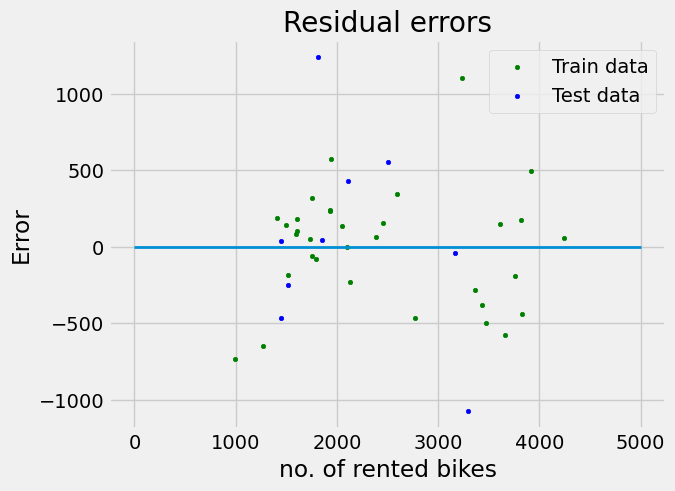

In [77]:
plt.style.use('fivethirtyeight') 
plt.scatter(regressor.predict(X_train), regressor.predict(X_train) - y_train,color = "green", s = 10, label = 'Train data') 
plt.scatter(regressor.predict(X_test), regressor.predict(X_test) - y_test,color = "blue", s = 10, label = 'Test data') 
plt.hlines(y = 0, xmin = 0, xmax = 5000, linewidth = 2) 
plt.legend(loc = 'upper right') 
plt.title("Residual errors") 
plt.xlabel("no. of rented bikes")
plt.ylabel("Error")
plt.show() 

### EVALUATING A MODEL USING R2 METRIC

#### Find the R^2 

In [78]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.6399490900724962


### When random_state parameter = 0 
#### Then Accuracy Score (Training:0.8645265385327265 and Testing:0.7514579825012834)
#### R2 Score 0.7514579825012834
#### Coefficient of model(4.22331775e+02  2.73914225e-12  9.61597544e+01 -5.50332007e+02 5.32224504e+01  7.18846264e+00 -1.00443106e+01)
#### Intercept of model(654.1725272540714)
#### Test Example Result: no. of rented bikes with Season = 3, Holiday = 1, Weekday =6, Weather = 2,Temp=12.977402, Humidity=64.9565, Wind_speed=15.608990 is equal to **2398.30732866**

### When random_state parameter = 9 
#### Then Accuracy Score (Training:0.8616920107012758 and Testing:0.6399490900724962)
#### R2 Score 0.6399490900724962
#### Coefficient of model(3.60715125e+02 -9.13047415e-13  1.21676589e+02 -2.63285887e+02 9.28286709e+01 -1.43994824e+00 -9.16210661e+00)
#### Intercept of model(192.33729330779852)
#### Test Example Result: no. of rented bikes with Season = 3, Holiday = 1, Weekday =6, Weather = 2,Temp=12.977402, Humidity=64.9565, Wind_speed=15.608990 is equal to **2446.10017653**